# Exploring Top Grossing Movies in 40 Years From The Perspective of Academy Awards

Author : Burhan Abbasi


#### Problem Statement 
Is it the top earning movies that win Oscars?

Loading Dependencies

In [11]:
import os 
_files= os.listdir(os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [2]:
#Loading Data set
data_top_ten ='blockbuster-top_ten_movies_per_year_DFE.csv'
data_oscars = 'Oscars-demographics-DFE edit.csv'

df_topTen = pd.read_csv(data_top_ten)
df_oscars = pd.read_csv(data_oscars)

In [4]:
df_topTen['title'].where(df_topTen['year']>=1975).head()
_mask = df_topTen['year']>=1975
df_topTen = df_topTen[_mask]

_mask = df_oscars['year_of_award']>=1975
df_oscars = df_oscars[_mask]

# 'Best Actor', 'Best Supporting Actor', 'Best Actress','Best Supporting Actress', 'Best Director'

_mask = (df_oscars['award']=='Best Actor')| (df_oscars['award']=='Best Actress')| (df_oscars['award']=='Best Supporting Actor') | (df_oscars['award']=='Best Supporting Actress') | (df_oscars['award']=='Best Director') 

df_oscars = df_oscars[_mask]
cols =['movie', 'person', 'award','year_of_award', 
       '_trusted_judgments','_last_judgment_at',
       'race_ethnicity','religion', 'sexual_orientation']
df_oscars= df_oscars [cols] 

In [5]:
#Merging two datasets
df_data= pd.merge(df_topTen, df_oscars, how='left', left_on='title', right_on='movie',  suffixes=('_x', '_y'))
df_data =df_data[['title','year', 'movie','person', 'award', 'year_of_award',
                  'audience_freshness', 'rt_audience_score', 'rt_freshness', 
                  'genres',  'imdb_rating', 'length', 'rank_in_year', 'rating', 
                  'release_date', 'studio' , 'worldwide_gross','adjusted' ,
                  'race_ethnicity', 'religion','sexual_orientation']]


,title,year,movie,person,award,year_of_award,audience_freshness,rt_audience_score,rt_freshness,genres,...,length,rank_in_year,rating,release_date,studio,worldwide_gross,adjusted,race_ethnicity,religion,sexual_orientation
0,Captain America: The Winter Soldier,2014.0,NaN,NaN,NaN,NaN,92.0,4.3,89.0,Sci-Fi\nAdventure\nAction,...,136.0,7.0,PG-13,4-Apr-14,Marvel Studios,"$714,766,572.00","$712,903,691.09",NaN,NaN,NaN
1,Dawn of the Planet of the Apes,2014.0,NaN,NaN,NaN,NaN,89.0,4.2,90.0,Sci-Fi\nDrama\nAction,...,130.0,9.0,PG-13,11-Jul-14,20th Century Fox,"$708,835,589.00","$706,988,165.89",NaN,NaN,NaN
2,Guardians of the Galaxy,2014.0,NaN,NaN,NaN,NaN,93.0,4.4,91.0,Sci-Fi\nAdventure\nAction,...,121.0,3.0,PG-13,1-Aug-14,Marvel Studios,"$774,176,600.00","$772,158,880.00",NaN,NaN,NaN
3,Interstellar,2014.0,NaN,NaN,NaN,NaN,86.0,4.2,72.0,Sci-Fi\nAdventure,...,169.0,10.0,PG-13,7-Nov-14,Paramount Pictures / Warner Bros.,"$672,974,414.00","$671,220,455.10",NaN,NaN,NaN
4,Maleficent,2014.0,NaN,NaN,NaN,NaN,71.0,3.8,49.0,Family\nAdventure\nAction,...,97.0,4.0,PG,30-May-14,Walt Disney Pictures,"$758,654,942.00","$756,677,675.77",NaN,NaN,NaN
5,The Amazing Spider-Man 2,2014.0,NaN,NaN,NaN,NaN,66.0,3.7,53.0,Fantasy\nAdventure\nAction,...,142.0,8.0,PG-13,2-May-14,Columbia Pictures,"$709,582,323.00","$707,732,953.69",NaN,NaN,NaN
6,The Hobbit: The Battle of the Five Armies,2014.0,NaN,NaN,NaN,NaN,76.0,3.9,61.0,Fantasy\nAdventure,...,144.0,2.0,PG-13,17-Dec-14,Warner Bros. / New Line Cinema / MGM,"$955,113,783.00","$952,624,490.27",NaN,NaN,NaN
7,The Hunger Games: Mockingjay - Part 1,2014.0,NaN,NaN,NaN,NaN,73.0,3.8,65.0,Sci-Fi\nAdventure,...,123.0,5.0,PG-13,21-Nov-14,Lionsgate Films,"$752,100,229.00","$750,140,046.17",NaN,NaN,NaN
8,Transformers: Age of Extinction,2014.0,NaN,NaN,NaN,NaN,52.0,3.3,18.0,Sci-Fi\nAdventure\nAction,...,165.0,1.0,PG-13,27-Jun-14,Paramount Pictures,"$1,091,404,499.00","$1,088,559,994.68",NaN,NaN,NaN
9,X-Men: Days of Future Past,2014.0,NaN,NaN,NaN,NaN,92.0,4.3,91.0,Sci-Fi\nAdventure\nAction,...,131.0,6.0,PG-13,23-May-14,20th Century Fox,"$748,121,534.00","$746,171,720.76",NaN,NaN,NaN


<IPython.core.display.Javascript object>


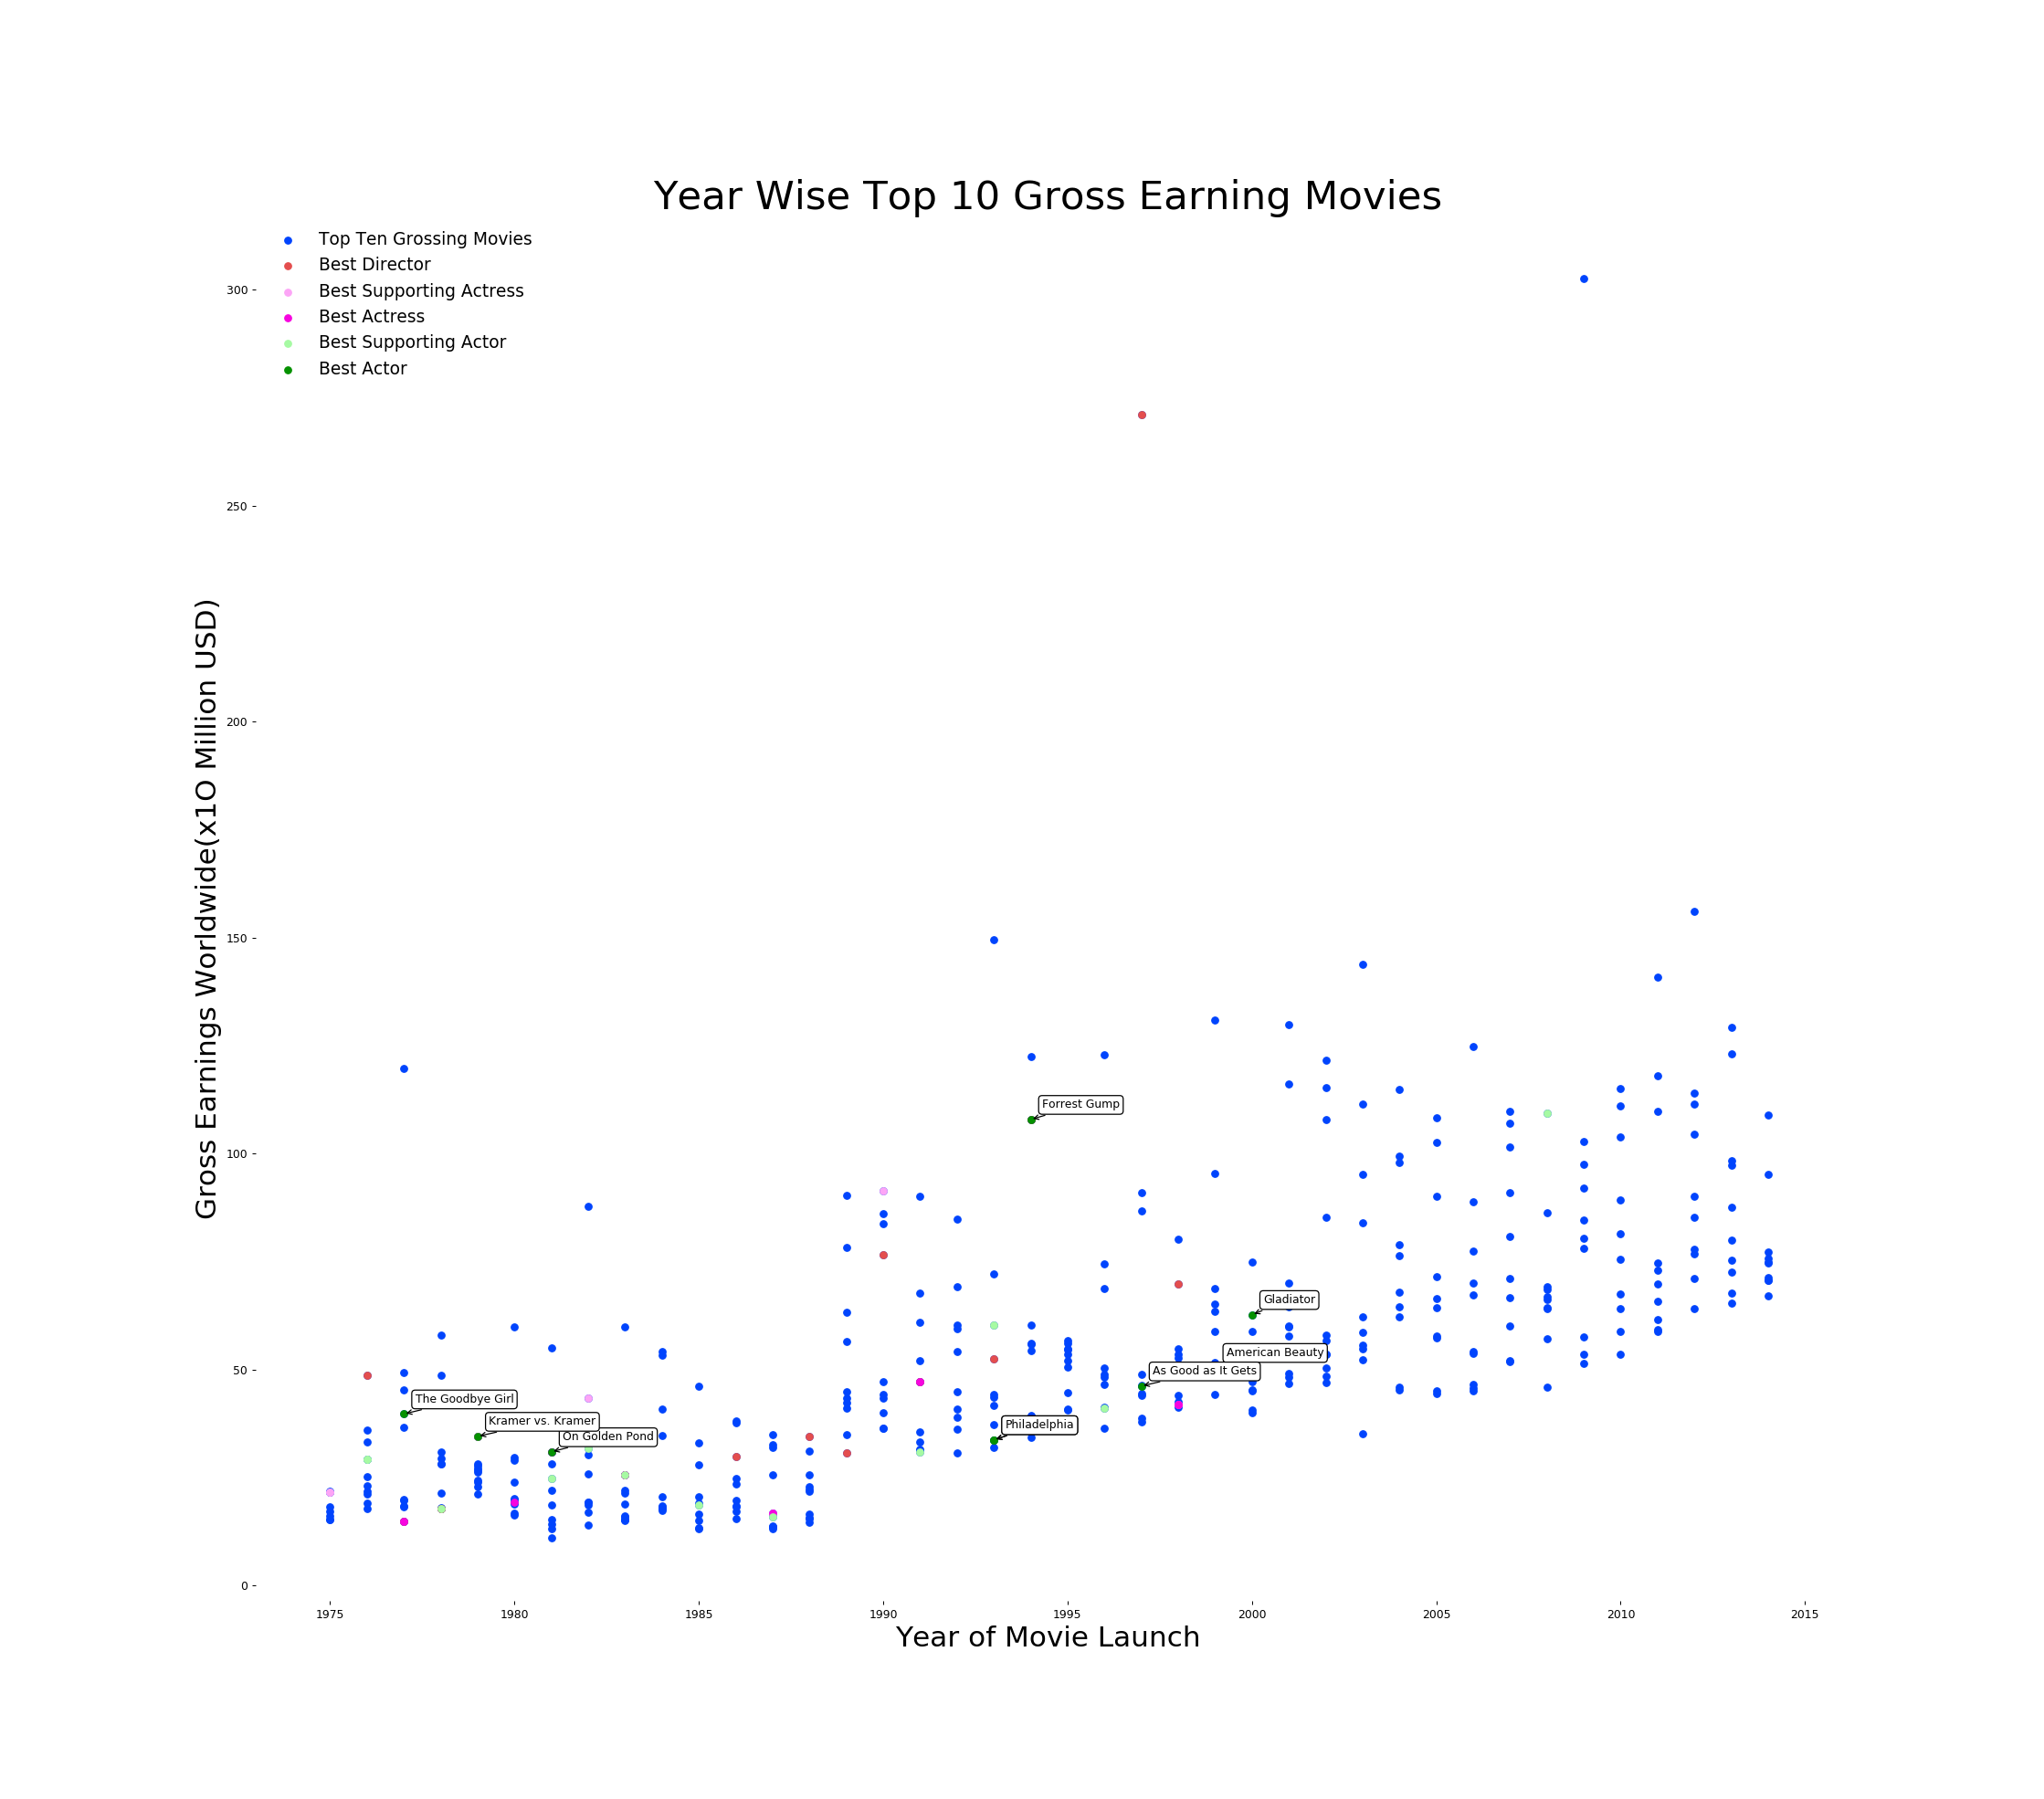

In [63]:

# df_data['earning']=df_data['worldwide_gross'].str.slice(1)
df_data['earning']=df_data['adjusted'].str.slice(1)
df_data['earning'] = df_data['earning'].str.strip()
df_data['earning'] = df_data['earning'].str.replace(',', '')
df_data['earning'] =df_data['earning'].astype(float)


fig= plt.figure(figsize=(25,22))
df_data['earning'] = df_data['earning']/10000000
plt.xlabel('Year of Movie Launch', fontsize=25)
plt.ylabel('Gross Earnings Worldwide(x1O Million USD)',fontsize=25)



ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Year Wise Top 10 Gross Earning Movies", fontsize=35)

_mask = ~df_data['movie'].isnull()
df_winners = df_data[_mask]

_mask = df_data['award']=='Best Actor'
df_Actor=df_data[_mask]

_mask = df_data['award']=='Best Actress'
df_Actress=df_data[_mask]


_mask = df_data['award']=='Best Supporting Actor'
df_SupportActor=df_data[_mask]

_mask = df_data['award']=='Best Supporting Actress'
df_SupportActress=df_data[_mask]

_mask = df_data['award']=='Best Director'
df_Director=df_data[_mask]


sc= plt.scatter(x=df_data['year'], y=df_data['earning'], c='#0044FD',  label='Top Ten Grossing Movies')
sc= plt.scatter(x=df_Director['year'], y=df_Director['earning'], c = '#E44E4E', label = 'Best Director')
sc= plt.scatter(x=df_SupportActress['year'], y=df_SupportActress['earning'], c = '#FCA5F6', label = 'Best Supporting Actress')
sc= plt.scatter(x=df_Actress['year'], y=df_Actress['earning'], c = '#F705DF', label = 'Best Actress')
sc= plt.scatter(x=df_SupportActor['year'], y=df_SupportActor['earning'], c = '#A6FAA3', label = 'Best Supporting Actor')
sc= plt.scatter(x=df_Actor['year'], y=df_Actor['earning'], c = '#059100', label = 'Best Actor')


plt.legend(loc = 2, frameon = False,fontsize=15)

annot = ax.annotate(s="", xy=(0,0))

for i in range(0,len(df_Actor)):
    annot =ax.annotate(s=df_Actor.iloc[i]['title'], xy=(df_Actor.iloc[i]['year'],df_Actor.iloc[i]['earning']), xytext=(10,10),textcoords="offset points",
                bbox=dict(boxstyle="round", fc="w"),
                arrowprops=dict(arrowstyle="->"))

plt.show()
